# Sustainable energy companies or Unsustainable? 
#### See the situation on the market right now!
The intuition behind this tool is that we insert both stocks considered as sustainable and unsustainabke (preferably in the same count) and than observe how many of the selected sustainable assets made it to the final portolio according to different optimizing strategies. The outcome can serve as a proxy for market performance disparities between companies considered sustainable and unsustainable.

##  Data analysis and visualisation part

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import datetime as dt
import yfinance as yf
import seaborn as sns
import functools as reduce
from scipy import optimize

# Import modules
import portfolio_optimization as pto
import EDA
import Portfolio_visualizations
import sustainability_calculations

## Loading the Data 
- We will take some of the biggest renewable Energy Companies in the World, as well as unsustainable (e.g. coal mining, gas, ..)
- feel free to add some more, do not forget to indicate them whether they are sustainable or not!:)

### Processing user input

In [2]:
sustainable_stocks = ['AQN', 'BEPC', 'CEG', 'CSIQ', 'DQ', 'GE', 'IBDRY', 'JKS', 'NEE', 'VWDRY']
unsustainable_stocks = ['EQNR', 'BP', '0857.HK', 'COP', 'FP.VI', 'SHEL', 'CVX', 'SR', 'ENEL.MI']
#in case you want to add stock, you shall indicate if the stock is sustainable or not!

Sustainable stocks = Algonquin Power & Utilities Corp., Brookfield Renewable Corporation, Constellation Energy Corporation, Canadian Solar Inc., Daqo New Energy Corp.,General Electric Company, Iberdrola, S.A., JinkoSolar Holding Co., Ltd., NextEra Energy, Inc., Vestas Wind Systems A/S

Unsustainable stocks = Equinor ASA, BP p.l.c., PetroChina Company Limited, ConocoPhillips, TotalEnergies SE, Shell plc, Chevron Corporation, Spire Inc., Enel SpA

We have selected one of the biggest companies on both sides, sustainable and unsustainable.


In [3]:
# Default list of tickers
default_tickers = [
    'AQN', 'BEPC', 'CEG', 'CSIQ', 'DQ', 'GE', 'IBDRY', 'JKS', 'NEE', 'VWDRY',
    'EQNR', 'BP', '0857.HK', 'COP', 'FP.VI', 'SHEL', 'CVX', 'SR', 'ENEL.MI'
]

# Prompt the user for additional tickers (optional)
user_input_str = input("Enter any additional tickers you want to analyze, separated by a comma, or press Enter to use default stocks only: ")

# Split the user input into a list, remove any empty strings
additional_tickers = [ticker.strip() for ticker in user_input_str.split(',') if ticker]

# Combine the default tickers with any additional tickers provided by the user
tickers = default_tickers + additional_tickers

# Create the adjusted close price dataframe
adj_close_df = pd.DataFrame()

# Populate the dataframe with adjusted close price data for the specified assets
for ticker in tickers:
    try:
        print(f"Downloading data for {ticker}")
        data = yf.download(ticker, period="2y", interval="1d")
        if not data.empty:
            adj_close_df[ticker] = data["Adj Close"]
        else:
            print(f"No data found for {ticker}, skipping.")
    except Exception as e:
        print(f"Failed to download {ticker}: {e}, skipping.")

Enter any additional tickers you want to analyze, separated by a comma, or press Enter to use default stocks only: 
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of

Shape of the DataFrame: (503, 19)
First 5 rows of the DataFrame:
                  AQN       BEPC        CEG       CSIQ         DQ         GE  \
Date                                                                           
2022-02-08  12.442010  31.439520  44.547150  27.340000  38.919998  76.960724   
2022-02-09  12.591596  32.636692  46.319244  28.200001  42.400002  76.914230   
2022-02-10  12.389216  32.120987  46.064686  27.910000  40.580002  76.557747   
2022-02-11  12.301224  31.890760  47.082912  27.600000  38.790001  75.038849   
2022-02-14  12.248428  31.817089  47.102493  27.360001  38.200001  74.860603   

                IBDRY        JKS        NEE     VWDRY       EQNR         BP  \
Date                                                                          
2022-02-08  39.472340  40.099373  71.855095  8.255078  24.618183  30.032234   
2022-02-09  39.865509  41.496296  72.997765  8.644374  25.093075  30.196989   
2022-02-10  39.792355  41.113579  71.845558  8.255078  25.

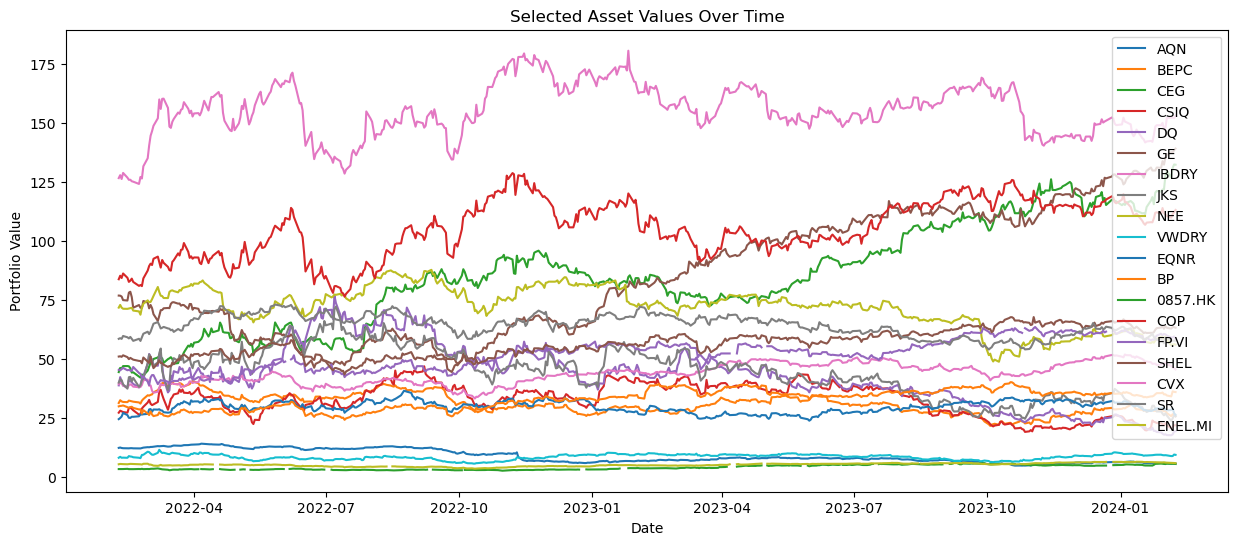

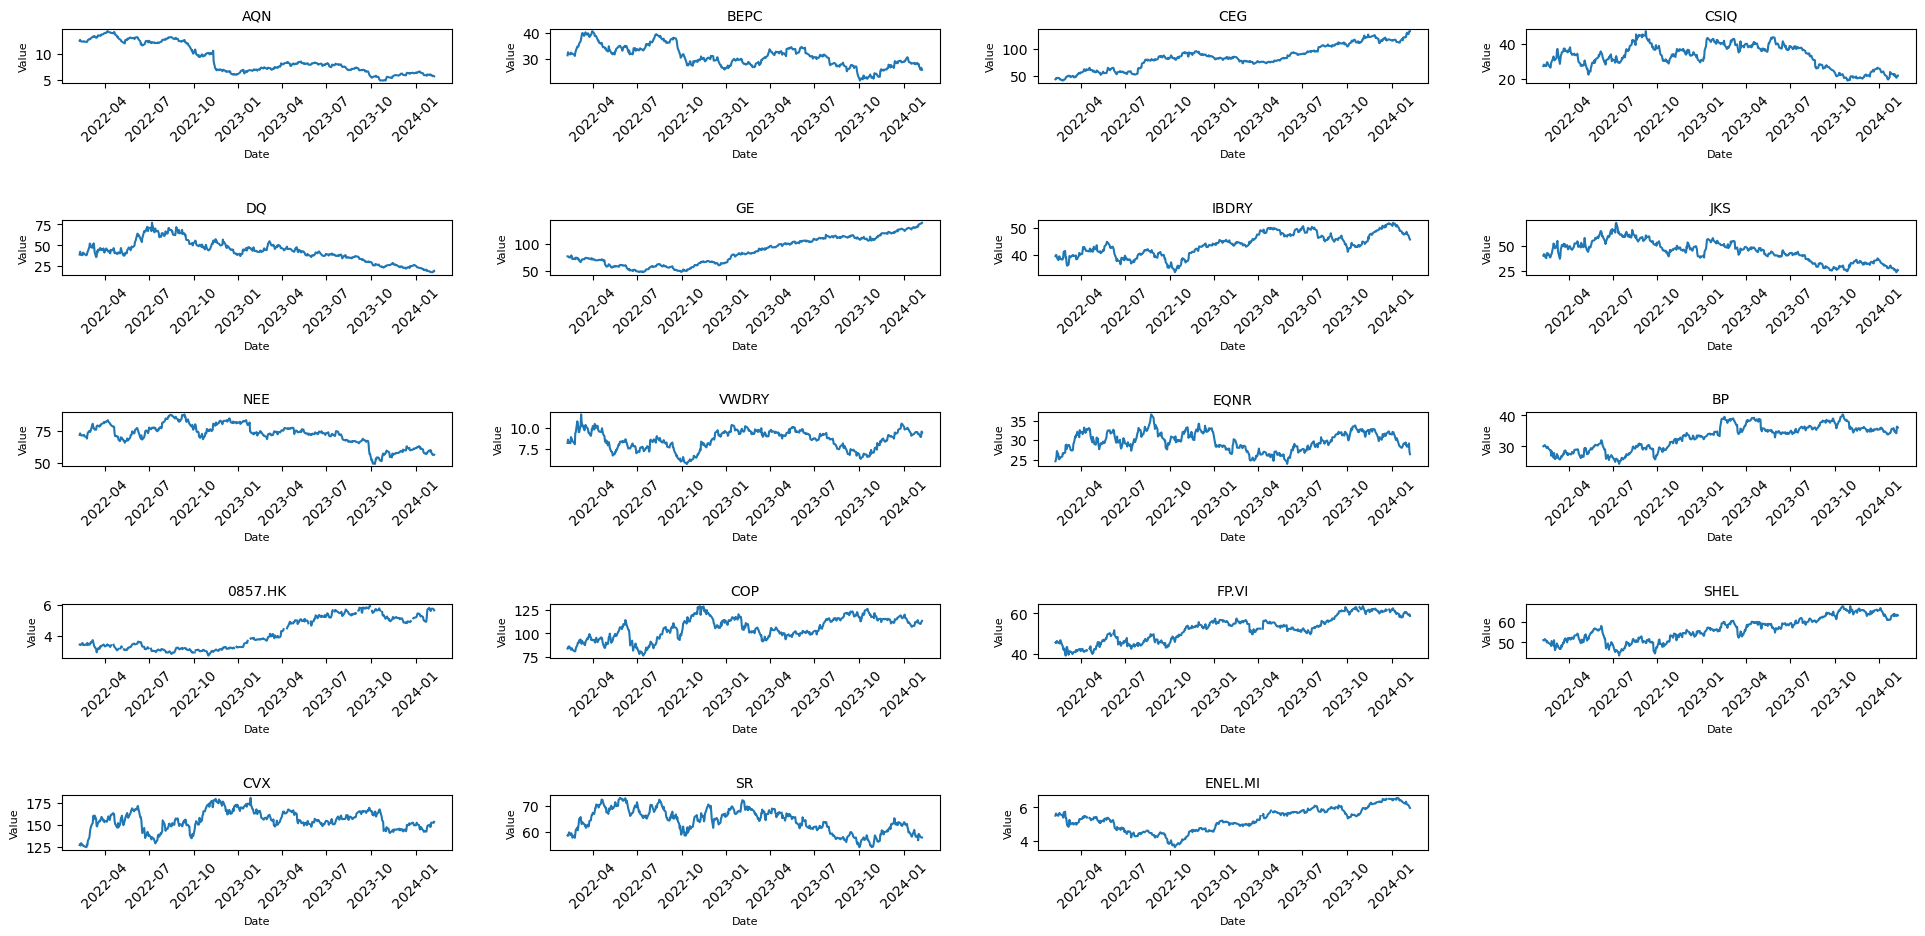

Box plot for distribution analysis


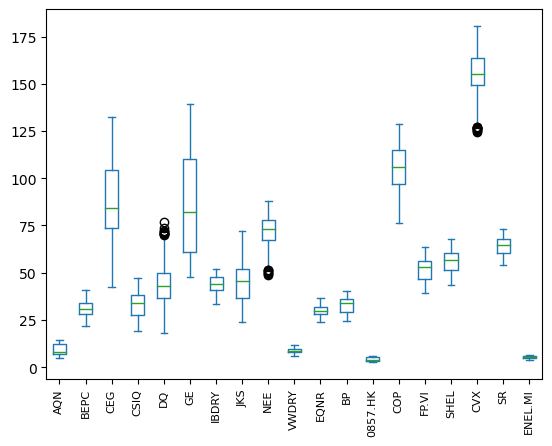

Heatmap for Correlation Between Assets


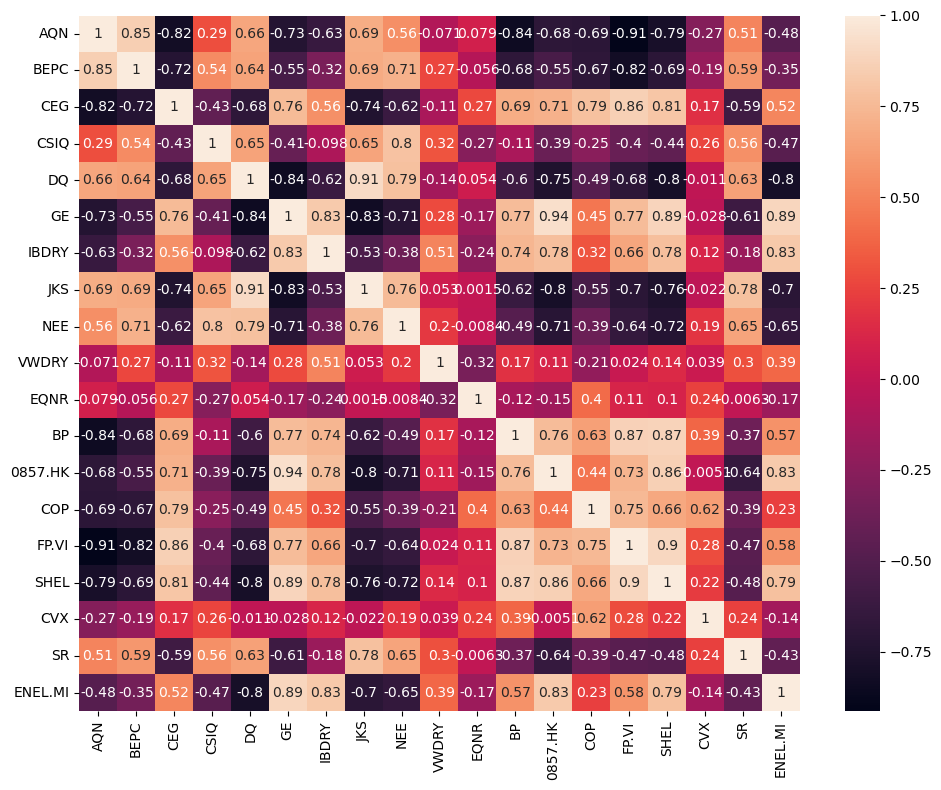

In [4]:
# Primary analysis
EDA.analyze_dataset(adj_close_df, summary_stat= True, data_quality = True, exploratory_analysis= True)

## Weights selection

#### Optimal weights of assets

Maxmimum Expected Return Method:
Expected Annual Return: 0.3063
Expected Volatility: 0.2051
Sharpe Ratio: 1.5909
Minimum Variance Method:
Expected Annual Return: 0.1052
Expected Volatility: 0.1440
Sharpe Ratio: 0.8692
Maximum Sharpe Ratio Method:
Expected Annual Return: 0.2746
Expected Volatility: 0.1732
Sharpe Ratio: 1.7013


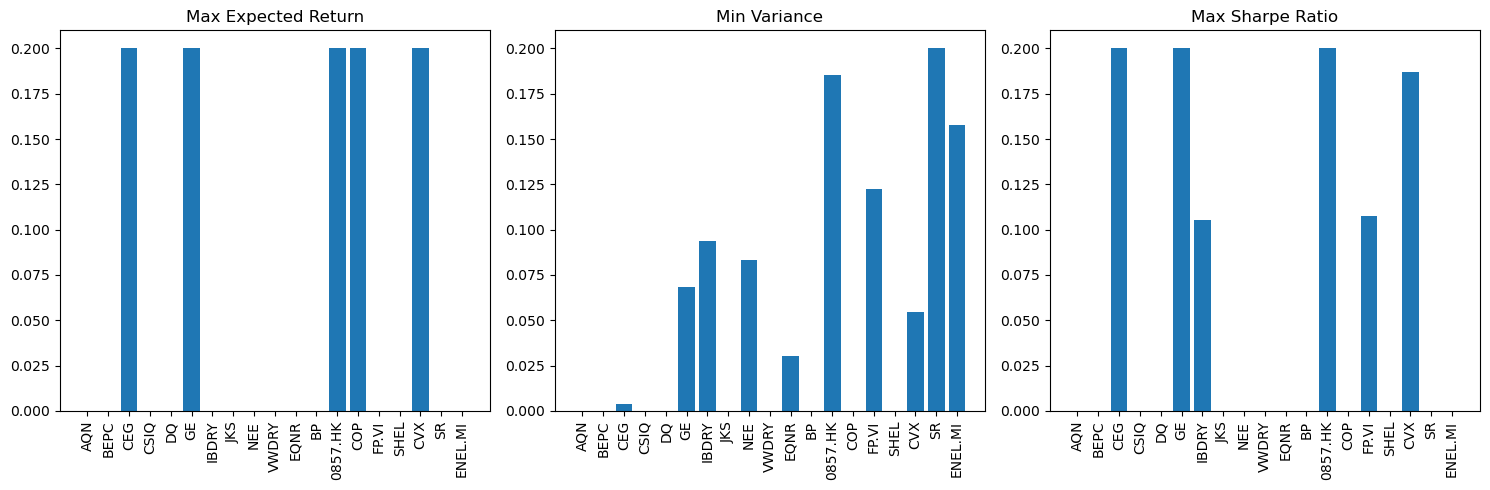

In [5]:
Portfolio_visualizations.optimal_weights_plot(adj_close_df, tickers)

In [6]:
# Optimal portfolio information for max_exp_return
optimal_result_max_exp_return = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="max_exp_return")
optimal_weights_max_exp_return = optimal_result_max_exp_return.x

# Optimal portfolio information for min_variance
optimal_result_min_variance = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="min_variance")
optimal_weights_min_variance = optimal_result_min_variance.x

# Optimal portfolio information for max_sharpe
optimal_result_max_sharpe = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="max_sharpe")
optimal_weights_max_sharpe = optimal_result_max_sharpe.x

Maximum Expected Return Method Sustainability Weights:
Sustainable Weight: 0.4000
Unsustainable Weight: 0.6000
According to the optimizing strategy 'Maximum Expected Return', the unsustainable companies outperform sustainable ones in the chosen time frame.
---

Minimum Variance Method Sustainability Weights:
Sustainable Weight: 0.2495
Unsustainable Weight: 0.7505
According to the optimizing strategy 'Minimum Variance', the unsustainable companies outperform sustainable ones in the chosen time frame.
---

Maximum Sharpe Ratio Method Sustainability Weights:
Sustainable Weight: 0.5056
Unsustainable Weight: 0.4944
According to the optimizing strategy 'Maximum Sharpe Ratio', both types of companies perform relatively similarly.
---



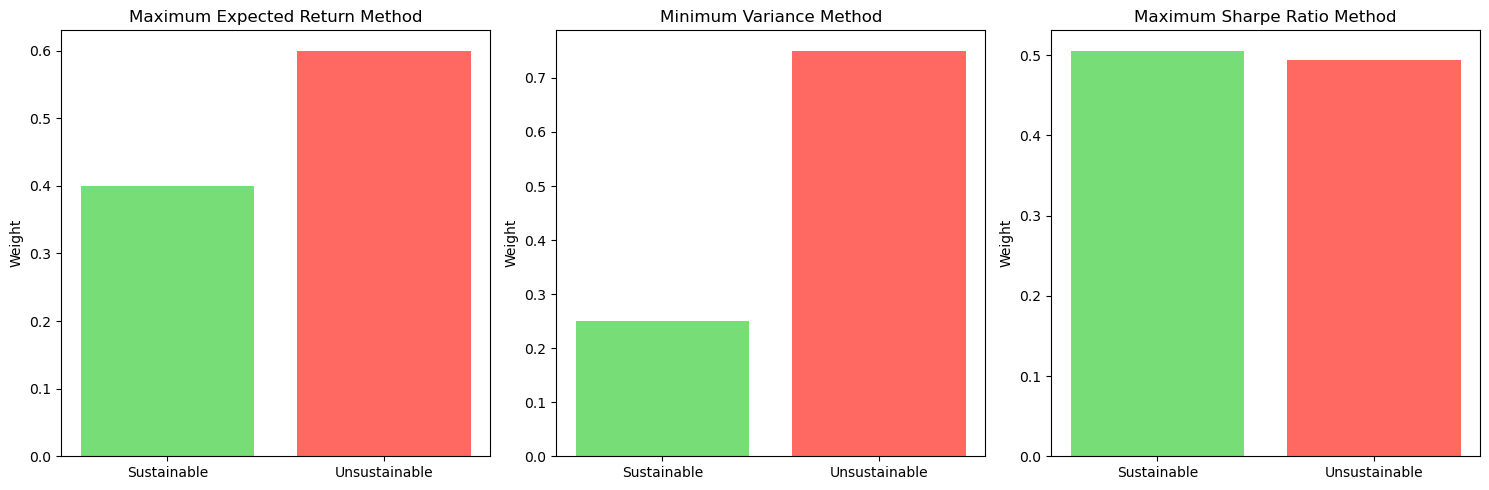

In [7]:
optimal_weights = [optimal_weights_max_exp_return, optimal_weights_min_variance, optimal_weights_max_sharpe]
method_names = ['Maximum Expected Return', 'Minimum Variance', 'Maximum Sharpe Ratio']
summaries = sustainability_calculations.process_results_and_generate_summaries(optimal_weights, tickers, sustainable_stocks, unsustainable_stocks, method_names)

#### Mind, that the resulting combination of stocks largely depends on the maxmimum allowed weight assigned to one asset during the optimization, feel free to mainuplate the weight to check robustness of your conclusions